# KELOMPOK 4 MACHINE LEARNING PAGI C

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df1 = pd.read_csv('luas_panen_2021.csv')
df2 = pd.read_csv('luas_panen_2022.csv')
df3 = pd.read_csv('lahan_sawah_2021_2022.csv')

In [3]:
df1.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten,nama_kabupaten,nama_perangkat_daerah,kode_kecamatan_kemendagri,kode_kecamatan_bps,nama_kecamatan,luas_panen,produktivitas,produksi,satuan,tahun
0,1,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.03,3214010,JATILUHUR,1164.0,5.66,6588,HEKTARE,2021
1,2,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.15,3214011,SUKASARI,1232.0,5.75,7084,HEKTARE,2021
2,3,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.07,3214020,MANIIS,1314.0,6.54,8594,HEKTARE,2021
3,4,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.08,3214030,TEGAL WARU,2865.0,6.30,18050,HEKTARE,2021
4,5,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.04,3214040,PLERED,3193.0,7.10,22670,HEKTARE,2021


In [4]:
df2.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten,nama_kabupaten,nama_perangkat_daerah,kode_kecamatan_kemendagri,kode_kecamatan_bps,nama_kecamatan,luas_panen,produktivitas,produksi,satuan,tahun
0,1,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.03,3214010,JATILUHUR,1064.0,5.74,6106,HEKTARE,2022
1,2,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.15,3214011,SUKASARI,1344.0,5.80,7795,HEKTARE,2022
2,3,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.07,3214020,MANIIS,1146.0,6.66,7632,HEKTARE,2022
3,4,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.08,3214030,TEGAL WARU,2883.0,6.40,18451,HEKTARE,2022
4,5,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,DISPANGTAN,32.14.04,3214040,PLERED,3381.0,7.00,23668,HEKTARE,2022


In [5]:
df3.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,rawa_pasang_surut,tadah_hujan,irigasi,jumlah,satuan,tahun
0,1,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,3214100,PURWAKARTA,32.14.01,PURWAKARTA,0,102,422,524,HEKTARE,2018
1,2,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,3214110,CAMPAKA,32.14.02,CAMPAKA,0,479,370,849,HEKTARE,2018
2,3,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,3214010,JATILUHUR,32.14.03,JATILUHUR,0,192,280,472,HEKTARE,2018
3,4,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,3214040,PLERED,32.14.04,PLERED,0,351,1089,1440,HEKTARE,2018
4,5,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,3214050,SUKATANI,32.14.05,SUKATANI,0,531,681,1212,HEKTARE,2018


In [6]:
# 1. Ambil Kolom yang Dibutuhkan
df1_f = df1[['nama_kecamatan','luas_panen','produktivitas','produksi','tahun']]
df2_f = df2[['nama_kecamatan','produktivitas','luas_panen','produksi','tahun']]
df3_f = df3[['bps_nama_kecamatan','tadah_hujan','irigasi','tahun']]


In [7]:
# 2. Filter Dataset 3 Agar Hanya Mengambil Tahun 2021 dan 2022
df3_f = df3_f[df3_f['tahun'].isin([2021, 2022])]

In [8]:
# 3. Samakan Nama Kolom Kecamatan pada Dataset 3
df3_f = df3_f.rename(columns={'bps_nama_kecamatan':'nama_kecamatan'})

In [9]:
# 4. Gabungkan Dataset 1 dan Dataset 2
gabung_12 = pd.concat([df1_f, df2_f], ignore_index=True)

In [10]:
# 5. Merge Dengan Dataset 3 berdasarkan nama_kecamatan dan tahun
final_df = gabung_12.merge(df3_f, on=['nama_kecamatan', 'tahun'], how='left')
final_df.head()

,nama_kecamatan,luas_panen,produktivitas,produksi,tahun,tadah_hujan,irigasi
0,JATILUHUR,1164.0,5.66,6588,2021,182,253
1,SUKASARI,1232.0,5.75,7084,2021,285,281
2,MANIIS,1314.0,6.54,8594,2021,659,0
3,TEGAL WARU,2865.0,6.30,18050,2021,871,476
4,PLERED,3193.0,7.10,22670,2021,141,1279


In [11]:
# 6. Cek Missing Values
final_df.isnull().sum()

nama_kecamatan    0
luas_panen        0
produktivitas     0
produksi          0
tahun             0
tadah_hujan       0
irigasi           0
dtype: int64

In [12]:
# 7. Tampilan Final Dataset
final_df = final_df[['nama_kecamatan',
                     'tahun',
                     'luas_panen',
                     'produktivitas',
                     'tadah_hujan',
                     'irigasi',
                     'produksi']]

final_df.head(35)

,nama_kecamatan,tahun,luas_panen,produktivitas,tadah_hujan,irigasi,produksi
0,JATILUHUR,2021,1164.0,5.66,182,253,6588
1,SUKASARI,2021,1232.0,5.75,285,281,7084
2,MANIIS,2021,1314.0,6.54,659,0,8594
3,TEGAL WARU,2021,2865.0,6.30,871,476,18050
4,PLERED,2021,3193.0,7.10,141,1279,22670
5,SUKATANI,2021,2573.0,6.35,529,681,16339
6,DARANGDAN,2021,4499.0,6.35,30,1583,28569
7,BOJONG,2021,2675.0,5.75,103,1087,15381
8,WANAYASA,2021,3371.0,5.65,136,1390,19046
9,KIARAPEDES,2021,2641.0,6.10,326,768,16110


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_kecamatan  34 non-null     object 
 1   tahun           34 non-null     int64  
 2   luas_panen      34 non-null     float64
 3   produktivitas   34 non-null     float64
 4   tadah_hujan     34 non-null     int64  
 5   irigasi         34 non-null     int64  
 6   produksi        34 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.0+ KB


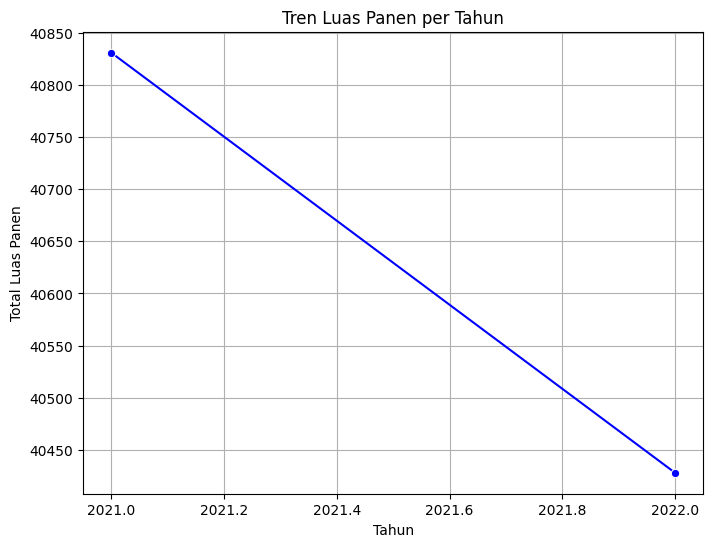

In [14]:
# EDA (Exploratory Data Analysis)
# 1. Line Plot – Tren Luas Panen per Tahun
df_line_luas = final_df.groupby('tahun')['luas_panen'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='tahun', y='luas_panen', data=df_line_luas, marker='o', color='blue')
plt.title('Tren Luas Panen per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Luas Panen')
plt.grid(True)
plt.show()

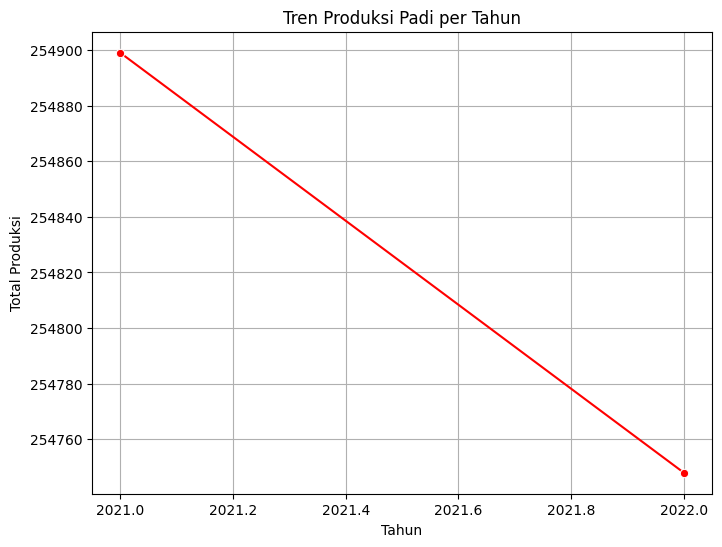

In [15]:
# 2. Line Plot – Tren Produksi Padi per Tahun
df_line_produksi = final_df.groupby('tahun')['produksi'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='tahun', y='produksi', data=df_line_produksi, marker='o', color='red')
plt.title('Tren Produksi Padi per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Produksi')
plt.grid(True)
plt.show()

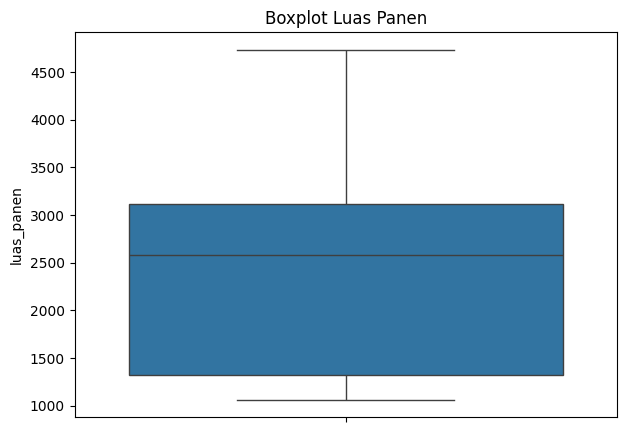

In [16]:
# 3. Boxplot Luas Panen
plt.figure(figsize=(7,5))
sns.boxplot(y=final_df['luas_panen'])
plt.title('Boxplot Luas Panen')
plt.show()

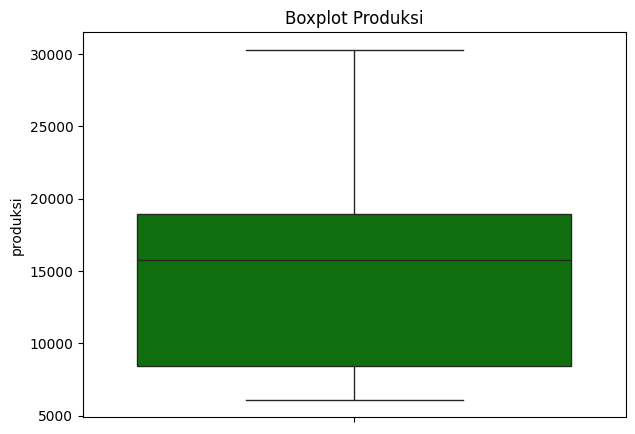

In [17]:
# 4. Boxplot Produksi
plt.figure(figsize=(7,5))
sns.boxplot(y=final_df['produksi'], color='green')
plt.title('Boxplot Produksi')
plt.show()

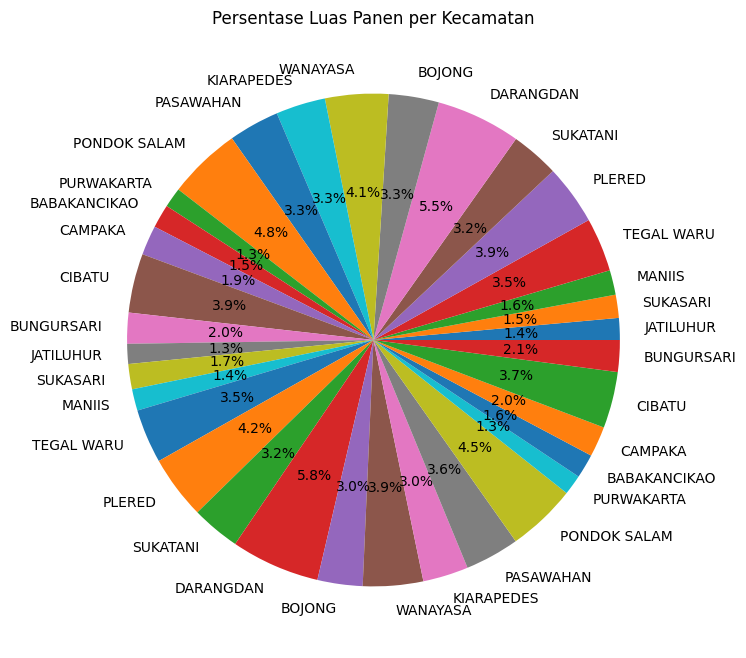

In [18]:
# 5. Pie Chart 1 – Luas Panen per Kecamatan
nama_kec = final_df['nama_kecamatan'].astype(str).values

plt.figure(figsize=(8,8))
plt.pie(final_df['luas_panen'], labels=nama_kec, autopct='%1.1f%%')
plt.title('Persentase Luas Panen per Kecamatan')
plt.show()

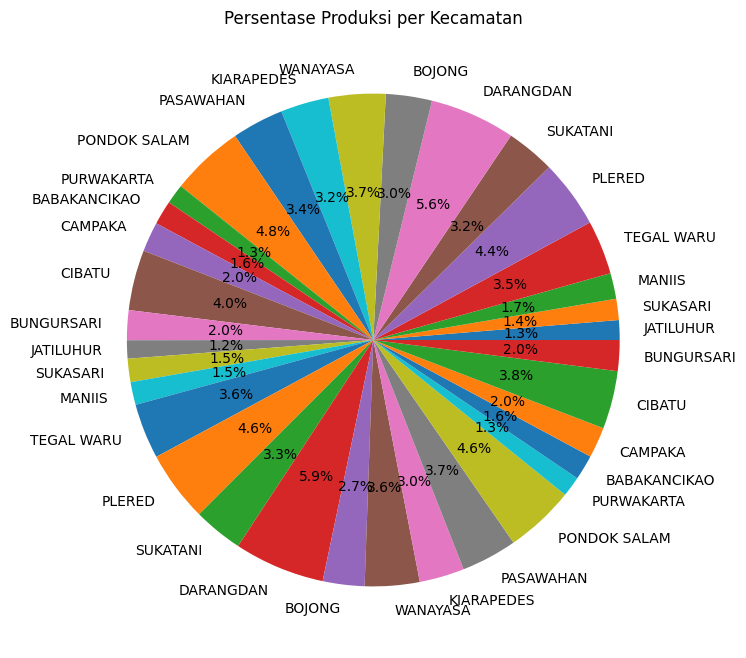

In [19]:
# 6. Pie Chart 2 – Produksi per Kecamatan
nama_kec = final_df['nama_kecamatan'].astype(str).values

plt.figure(figsize=(8,8))
plt.pie(final_df['produksi'], labels=nama_kec, autopct='%1.1f%%')
plt.title('Persentase Produksi per Kecamatan')
plt.show()

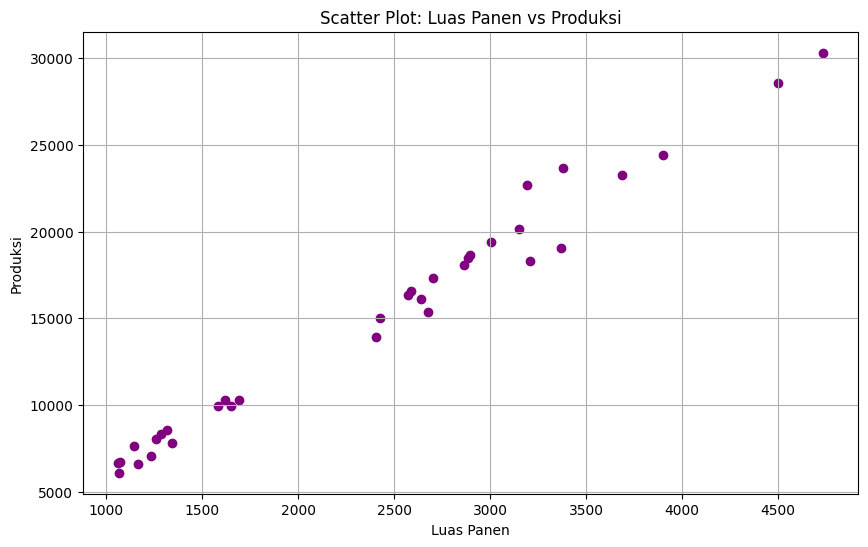

In [20]:
# 7. Scatter: Luas Panen vs Produksi
plt.figure(figsize=(10,6))
plt.scatter(final_df['luas_panen'], final_df['produksi'], color='purple')
plt.title('Scatter Plot: Luas Panen vs Produksi')
plt.xlabel('Luas Panen')
plt.ylabel('Produksi')
plt.grid(True)
plt.show()

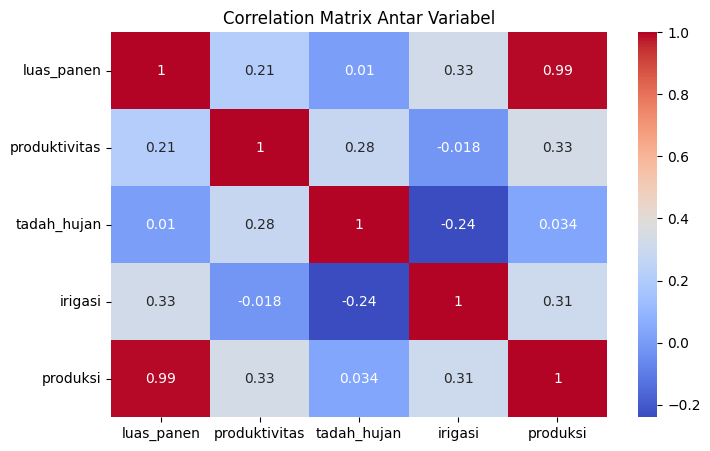

In [21]:
# 8. Correlation Matrix + Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(
    final_df[['luas_panen','produktivitas','tadah_hujan','irigasi','produksi']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Matrix Antar Variabel')
plt.show()

In [22]:
# 9. Menampilkan Plot Animasi 3D
fig = px.scatter_3d(
    final_df,
    x='luas_panen',
    y='produktivitas',
    z='produksi',
    color='nama_kecamatan',
    size='produksi',
    hover_data=['nama_kecamatan', 'tahun', 'luas_panen', 'produktivitas', 'tadah_hujan', 'irigasi', 'produksi'],
    hover_name='nama_kecamatan',
    title='Pengaruh Luas Panen & Produktivitas terhadap Produksi Padi di Setiap Kecamatan'
)

fig.show()

# Fase 3: Modeling (Regresi Linier Berganda)

In [23]:
# 1. Memisahkan fitur (X) dan target (y)
X = final_df[['luas_panen','produktivitas',
              'tadah_hujan','irigasi']]
Y = final_df['produksi']

In [24]:
# 2. Split Data (Train & Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [25]:
# 3. Membuat model regresi linier Berganda
model_pred_produksi_padi = LinearRegression()
model_pred_produksi_padi.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# 4. Menampilkan intercept regresi dari model 
intercept = model_pred_produksi_padi.intercept_
intercept

np.float64(-15571.58804313632)

In [27]:
final_df.head()

,nama_kecamatan,tahun,luas_panen,produktivitas,tadah_hujan,irigasi,produksi
0,JATILUHUR,2021,1164.0,5.66,182,253,6588
1,SUKASARI,2021,1232.0,5.75,285,281,7084
2,MANIIS,2021,1314.0,6.54,659,0,8594
3,TEGAL WARU,2021,2865.0,6.30,871,476,18050
4,PLERED,2021,3193.0,7.10,141,1279,22670


In [28]:
# 5. Menampilkan koefisien regresi dari model
coefficients = model_pred_produksi_padi.coef_
coefficients

array([ 6.26292917e+00,  2.51967999e+03, -2.76544588e-01, -2.34859130e-02])

In [29]:
manual = intercept+(1164.0*6.26292917e+00)+(6.30*2.51967999e+03)+(141*-2.76544588e-01)+(1279*-2.34859130e-02)
manual

np.float64(7523.414178108681)

In [30]:
# Data input untuk prediksi
input_data = np.array([[1164.0, 6.30, 141, 1279]])

In [31]:
# Melakukan prediksi
predicted_padi = model_pred_produksi_padi.predict(input_data)
predicted_padi

c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([7523.41416515])

In [32]:
# 6. Prediksi Menggunakan Data Uji
y_pred = model_pred_produksi_padi.predict(X_test)

In [33]:
# 7. Evaluasi Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE : 311.7683194423067
MSE : 154013.20391343808
RMSE: 392.4451603898793
R2 Score: 0.9933577293494209


In [34]:
import pickle

filename = 'regression_model.pkl'
pickle.dump(model_pred_produksi_padi, open(filename, 'wb')) 